In [28]:
import pandas as pd
from pathlib import Path


## 1. Data Cleaning and Initial Exploration

In [29]:
data_dir = Path("../data/raw")

files = list(data_dir.glob("*.csv"))
files

[WindowsPath('../data/raw/FOOD-DATA-GROUP1.csv'),
 WindowsPath('../data/raw/FOOD-DATA-GROUP2.csv'),
 WindowsPath('../data/raw/FOOD-DATA-GROUP3.csv'),
 WindowsPath('../data/raw/FOOD-DATA-GROUP4.csv'),
 WindowsPath('../data/raw/FOOD-DATA-GROUP5.csv')]

### 1.1 Identifying grouping logic behind dataset

In [30]:
for file in files:
    print("\n---", file.name, "---")
    df = pd.read_csv(file)
    col_name = df.columns[2]
    print(df[col_name].head(20).tolist())
    print(df[col_name].tail(20).tolist())



--- FOOD-DATA-GROUP1.csv ---
['cream cheese', 'neufchatel cheese', 'requeijao cremoso light catupiry', 'ricotta cheese', 'cream cheese low fat', 'cream cheese fat free', 'gruyere cheese', 'cheddar cheese', 'parmesan cheese', 'romano cheese', 'parmesan cheese grated', 'port salut cheese', 'swiss cheese', 'goat cheese hard', 'gouda cheese', 'pepper jack cheese lucerne', 'caraway cheese', 'gjetost cheese', 'tilsit cheese', 'goat cheese']
['squid raw', 'scallop raw', 'lobster raw', 'scallop imitation', 'blue crab raw', 'whelk raw', 'spiny lobster raw', 'clams canned', 'lobster cooked', 'eastern oyster fried', 'clams raw', 'octopus cooked', 'eastern oyster raw', 'oyster fried', 'sturgeon smoked', 'chinook salmon smoked', 'cisco smoked', 'haddock smoked', 'whitefish smoked', 'red salmon sockeye filets smoked']

--- FOOD-DATA-GROUP2.csv ---
['eggnog', 'beer light', 'beer budweiser', 'weizenbier erdinger', 'beer light budweiser', 'beer', 'root beer', 'whiskey sour mix', 'whiskey sour', 'tequi

#### After inspecting the food names from each file, I discovered that the groups did not reflect actual food categories, therefore i'll merge all files into one dataset for future categorization

In [31]:
processed_dir = Path("../data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

dfs = []

for file in files:
    df = pd.read_csv(file)
    df["source_group"] = file.stem
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

In [32]:
output_path = processed_dir / "foods_data.csv"
data.to_csv(output_path, index=False)

output_path

WindowsPath('../data/processed/foods_data.csv')

### 1.2 Basic exploration functions

In [33]:
df = pd.read_csv(Path("../data/processed/foods_data.csv"))
df.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,source_group
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,FOOD-DATA-GROUP1
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,FOOD-DATA-GROUP1
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400,FOOD-DATA-GROUP1
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,FOOD-DATA-GROUP1
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,FOOD-DATA-GROUP1


In [34]:
df.shape

(2395, 38)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          2395 non-null   int64  
 1   Unnamed: 0            2395 non-null   int64  
 2   food                  2395 non-null   object 
 3   Caloric Value         2395 non-null   int64  
 4   Fat                   2395 non-null   float64
 5   Saturated Fats        2395 non-null   float64
 6   Monounsaturated Fats  2395 non-null   float64
 7   Polyunsaturated Fats  2395 non-null   float64
 8   Carbohydrates         2395 non-null   float64
 9   Sugars                2395 non-null   float64
 10  Protein               2395 non-null   float64
 11  Dietary Fiber         2395 non-null   float64
 12  Cholesterol           2395 non-null   float64
 13  Sodium                2395 non-null   float64
 14  Water                 2395 non-null   float64
 15  Vitamin A            

In [36]:
# Sample 50 rows to inspect food names and their source groups and confirm theres no grouping logic
df[["food", "source_group"]].sample(50, random_state=42)


,food,source_group
443,carp raw,FOOD-DATA-GROUP1
196,green pea soup,FOOD-DATA-GROUP1
1505,powerade zero ion4 coca cola,FOOD-DATA-GROUP4
1956,french dressing reduced fat,FOOD-DATA-GROUP5
2091,napa cabbage cooked,FOOD-DATA-GROUP5
321,hand breaded chicken tenders carls jr,FOOD-DATA-GROUP1
2378,shiitake mushrooms cooked,FOOD-DATA-GROUP5
1644,salat mix alestro,FOOD-DATA-GROUP4
1383,pork tail cooked,FOOD-DATA-GROUP3
2155,acorn squash cooked,FOOD-DATA-GROUP5


In [37]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'food', 'Caloric Value', 'Fat',
       'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
       'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol',
       'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11',
       'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6',
       'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper',
       'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium',
       'Zinc', 'Nutrition Density', 'source_group'],
      dtype='object')

In [38]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 0.1            0
Unnamed: 0              0
food                    0
Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
source_group            0
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,272.258038,272.258038,223.769520,10.176276,3.924917,4.133622,2.152844,18.589021,4.457459,13.400777,...,52.047728,9.581689,1.853271,34.429792,5.349964,156.236052,303.833939,52.258006,1.579192,106.929006
std,182.889214,182.889214,384.728244,29.008915,19.502262,12.939587,7.145738,29.406134,13.339929,32.294246,...,115.933379,69.912400,5.155650,71.927990,21.005332,333.257099,589.507589,199.257203,4.937509,173.023891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,119.000000,119.000000,44.500000,0.300000,0.064000,0.058000,0.071000,0.500000,0.000000,0.800000,...,0.600000,0.040000,0.100000,1.500000,0.037000,0.800000,27.750000,0.016000,0.055000,16.876500
50%,241.000000,241.000000,117.000000,2.100000,0.500000,0.500000,0.400000,6.800000,0.086000,3.500000,...,13.900000,0.100000,0.600000,10.400000,0.200000,42.300000,112.300000,0.053000,0.300000,53.840000
75%,414.500000,414.500000,258.000000,9.400000,2.700000,3.400000,1.700000,25.050000,3.200000,13.300000,...,48.250000,0.400000,1.800000,36.950000,0.700000,171.350000,340.500000,0.090000,1.200000,135.074500
max,721.000000,721.000000,6077.000000,550.700000,672.000000,291.100000,188.000000,390.200000,291.500000,560.300000,...,1283.500000,1890.000000,121.200000,921.600000,451.000000,5490.000000,11336.900000,3308.000000,147.300000,3911.400000


### 1.3 Nutrient Distribution

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
nutrients = ["Caloric Value", "Protein", "Fat", "Carbohydrates", "Sugars", "Sodium"]

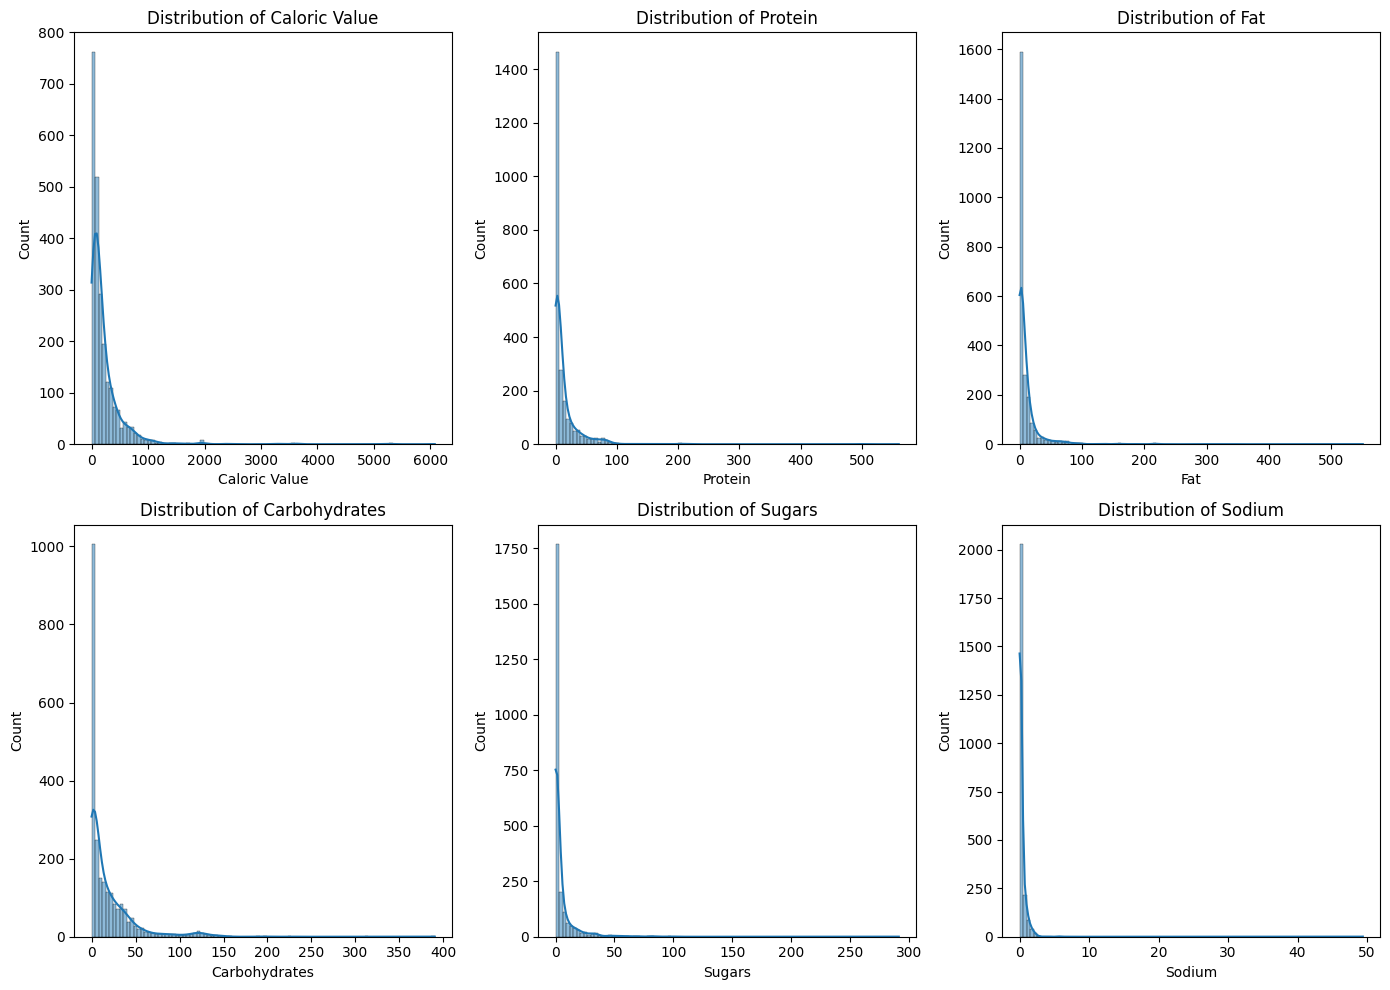

In [43]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(nutrients, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

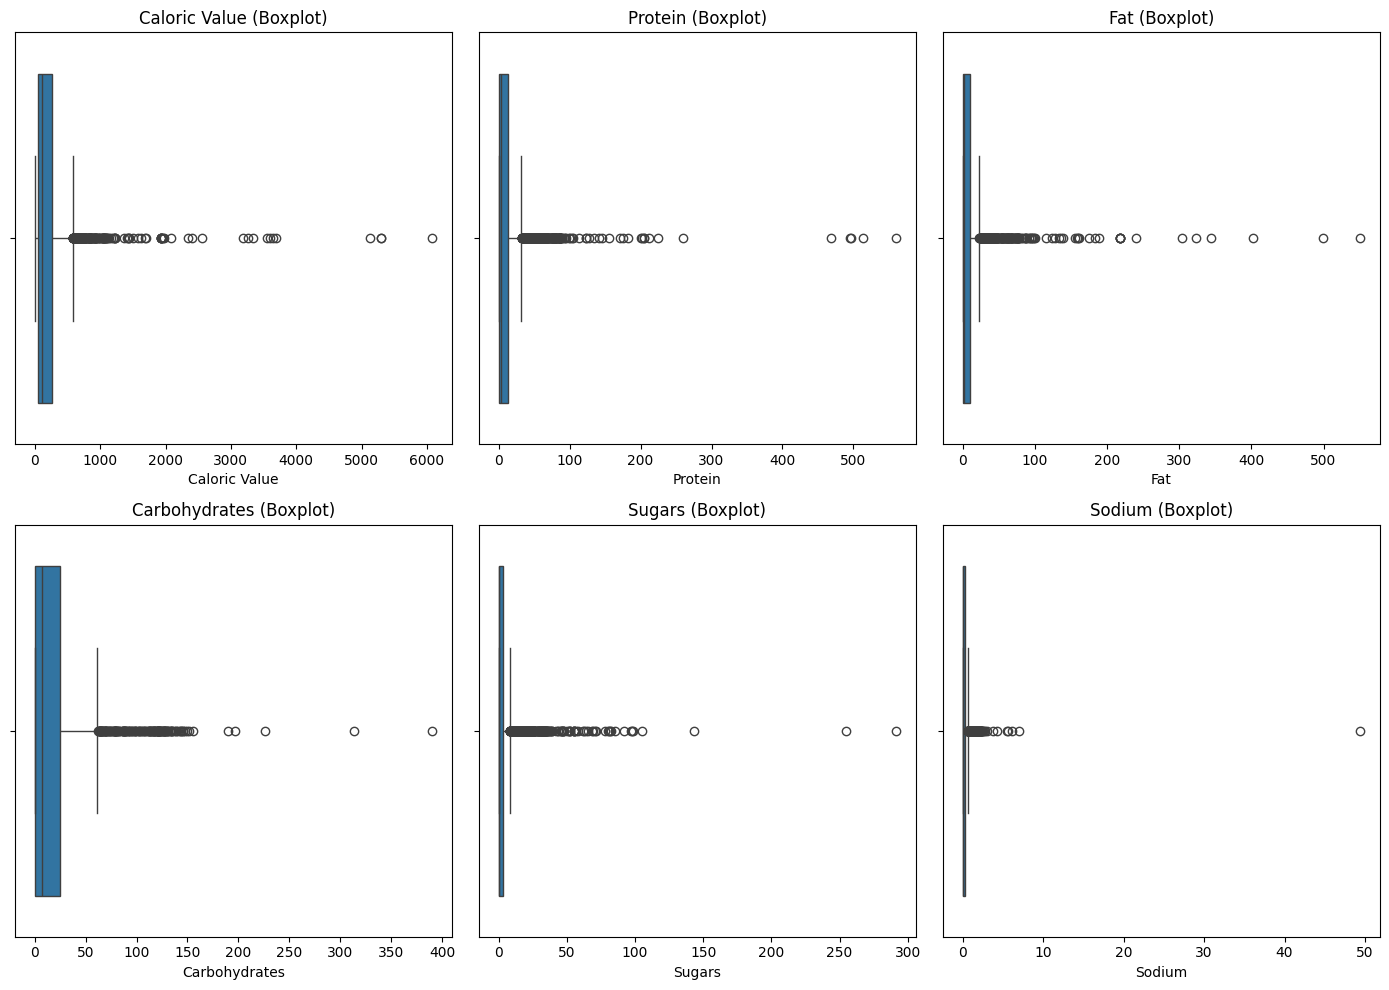

In [44]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(nutrients, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"{col} (Boxplot)")

plt.tight_layout()
plt.show()

#### There are not many outliers in the dataset, but the ones that exist are extremely anomalouse. For better understanding, I will visualize foods with caloric values above 1,000 kcal, which are possible but relatively rare

In [45]:
df[df["Caloric Value"] > 1000]

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,source_group
17,17,17,gjetost cheese,1058,67.0,43.5,17.9,2.1,96.8,0.0,...,0.200,1.2,158.9,0.035,1007.900,3198.4,0.039,2.600,1095.700,FOOD-DATA-GROUP1
83,83,83,lemon chicken,1440,74.9,12.2,16.4,36.7,122.0,55.2,...,0.200,8.4,95.6,0.600,821.700,987.4,0.001,3.200,545.212,FOOD-DATA-GROUP1
153,153,153,general tsos chicken,1578,87.5,14.8,20.8,40.1,128.3,62.1,...,0.200,6.2,96.3,0.400,679.500,1075.4,0.065,7.000,368.673,FOOD-DATA-GROUP1
317,317,317,double whopper with cheese burger king,1061,68.1,27.9,25.1,11.9,53.9,14.4,...,0.300,21.1,75.8,0.600,510.700,754.1,0.075,14.000,519.200,FOOD-DATA-GROUP1
622,71,71,vanilla frosting,1931,75.0,13.7,22.5,36.7,313.7,291.5,...,0.000,0.7,4.6,0.000,83.200,157.1,0.029,0.300,403.300,FOOD-DATA-GROUP2
632,81,81,almond paste,1040,63.0,6.0,40.9,13.2,108.5,82.3,...,1.000,3.6,295.1,1.900,585.700,712.8,0.037,3.400,597.000,FOOD-DATA-GROUP2
707,156,156,banana cream pie,3190,161.3,44.6,67.8,39.0,390.2,143.0,...,0.600,12.3,189.8,1.800,1091.100,1956.9,0.100,5.700,1533.500,FOOD-DATA-GROUP2
781,230,230,weetabix weetabix,2078,11.5,396.1,68.9,57.4,0.0,0.0,...,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,11.500,FOOD-DATA-GROUP2
999,129,129,coconut whole coconut,3336,71.5,672.0,48.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,71.500,FOOD-DATA-GROUP3
1009,139,139,coconut meat,1405,133.0,117.9,5.7,1.5,60.5,24.7,...,1.700,9.6,127.0,6.000,448.600,1413.3,0.056,4.400,320.700,FOOD-DATA-GROUP3


#### Some foods in the dataset have illogical caloric values—for example, certain raw meats such as goose meat, which is listed at 6,077 kcal. In contrast, some desserts could plausibly have high caloric values due to sugars and other ingredients, although their values are still unusually high.

#### One hypothesis is that some entries may be recorded per 1 kg rather than per 100 g. To verify this, I will compare the caloric values with their corresponding protein content (could be another macronutrient) to assess whether the data is consistent.

In [46]:
high_cal = df[df["Caloric Value"] > 1000]

In [47]:
high_cal[["food", "Caloric Value", "Protein"]]
#high_cal.sort_values(by=["Caloric Value", "Protein"], ascending=[False, False])


,food,Caloric Value,Protein
17,gjetost cheese,1058,21.9
83,lemon chicken,1440,68.6
153,general tsos chicken,1578,69.0
317,double whopper with cheese burger king,1061,57.7
622,vanilla frosting,1931,0.0
632,almond paste,1040,20.4
707,banana cream pie,3190,52.2
781,weetabix weetabix,2078,0.0
999,coconut whole coconut,3336,0.0
1009,coconut meat,1405,13.2


#### Insight: some oils, raw meats, and prepackaged foods (banana cream pie, puff pastry, etc) are shown per whole item, not per 100g

In [48]:
df["kcal_per_g"] = df["Caloric Value"] / 100


#### Any food with kcal_per_g > 9 is impossible (because fat = 9 kcal/g)

In [49]:
df[df["Caloric Value"] > 900]


,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,source_group,kcal_per_g
17,17,17,gjetost cheese,1058,67.0,43.5,17.9,2.1,96.8,0.0,...,1.2,158.9,0.035,1007.9,3198.4,0.039,2.600,1095.700,FOOD-DATA-GROUP1,10.58
83,83,83,lemon chicken,1440,74.9,12.2,16.4,36.7,122.0,55.2,...,8.4,95.6,0.600,821.7,987.4,0.001,3.200,545.212,FOOD-DATA-GROUP1,14.40
153,153,153,general tsos chicken,1578,87.5,14.8,20.8,40.1,128.3,62.1,...,6.2,96.3,0.400,679.5,1075.4,0.065,7.000,368.673,FOOD-DATA-GROUP1,15.78
306,306,306,double hamburger,942,58.6,21.6,22.9,11.3,51.4,13.2,...,0.4,10.5,67.300,0.7,415.1,718.100,0.026,169.626,FOOD-DATA-GROUP1,9.42
317,317,317,double whopper with cheese burger king,1061,68.1,27.9,25.1,11.9,53.9,14.4,...,21.1,75.8,0.600,510.7,754.1,0.075,14.000,519.200,FOOD-DATA-GROUP1,10.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,260,260,ranch flavor tortilla chips,992,48.8,7.0,14.0,26.8,124.2,6.0,...,2.7,172.3,0.700,499.0,512.8,0.032,2.800,463.100,FOOD-DATA-GROUP5,9.92
1939,266,266,taco flavor tortilla chips,1090,54.9,10.5,32.4,7.6,143.2,0.0,...,4.6,199.8,1.000,542.5,492.6,0.075,2.900,586.500,FOOD-DATA-GROUP5,10.90
1940,267,267,potato chips barbecue,970,64.2,15.9,12.9,32.4,104.5,14.0,...,3.8,148.5,1.000,368.3,2496.8,0.020,1.900,362.500,FOOD-DATA-GROUP5,9.70
1942,269,269,potato chips sour cream and onion,1051,67.1,17.6,12.1,34.5,102.0,0.0,...,3.2,146.5,0.800,348.5,2635.4,0.000,1.900,415.171,FOOD-DATA-GROUP5,10.51


In [50]:
df = df[df["Caloric Value"] <= 900]

#### I decided to remove those rows because there was no column that reliably confirmed standardized units (e.g., entries not in 100 g may be in 1 kg), and some products had variable portion sizes. Normalizing these entries could have introduced inaccuracies. Additionally, the removal affected only a small portion of the dataset, reducing it from 2,395 to 2,322 rows

In [51]:
df = df.drop(columns=['kcal_per_g'])
df.shape

(2322, 38)

#### After removing anomalous entries I re-plotted the nutrients distributions and compared to initial plots, the ranges are now more reasonable

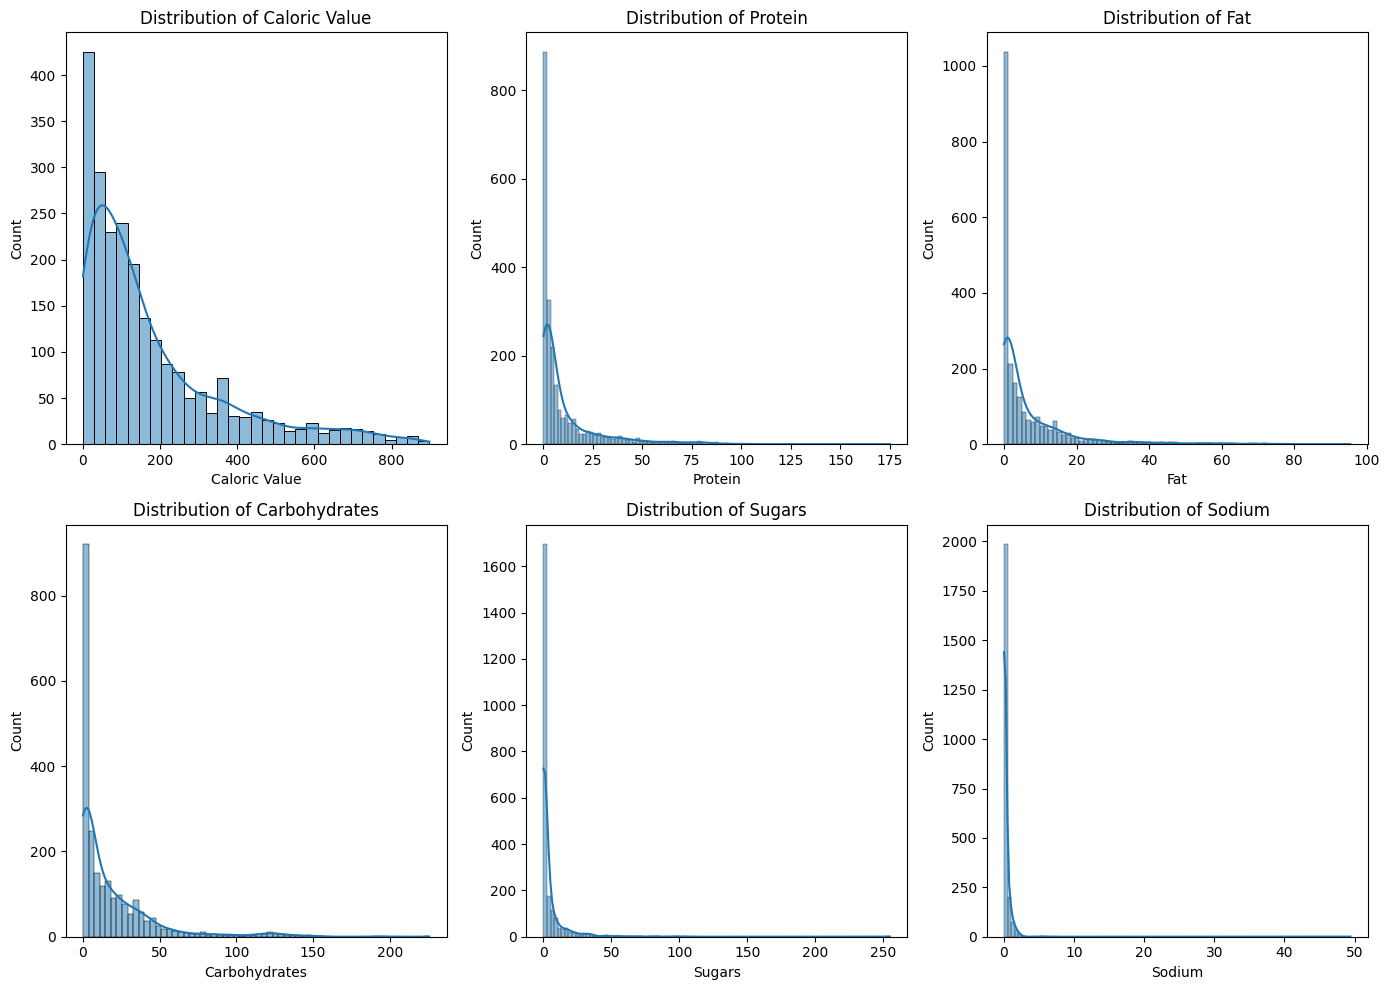

In [52]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(nutrients, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

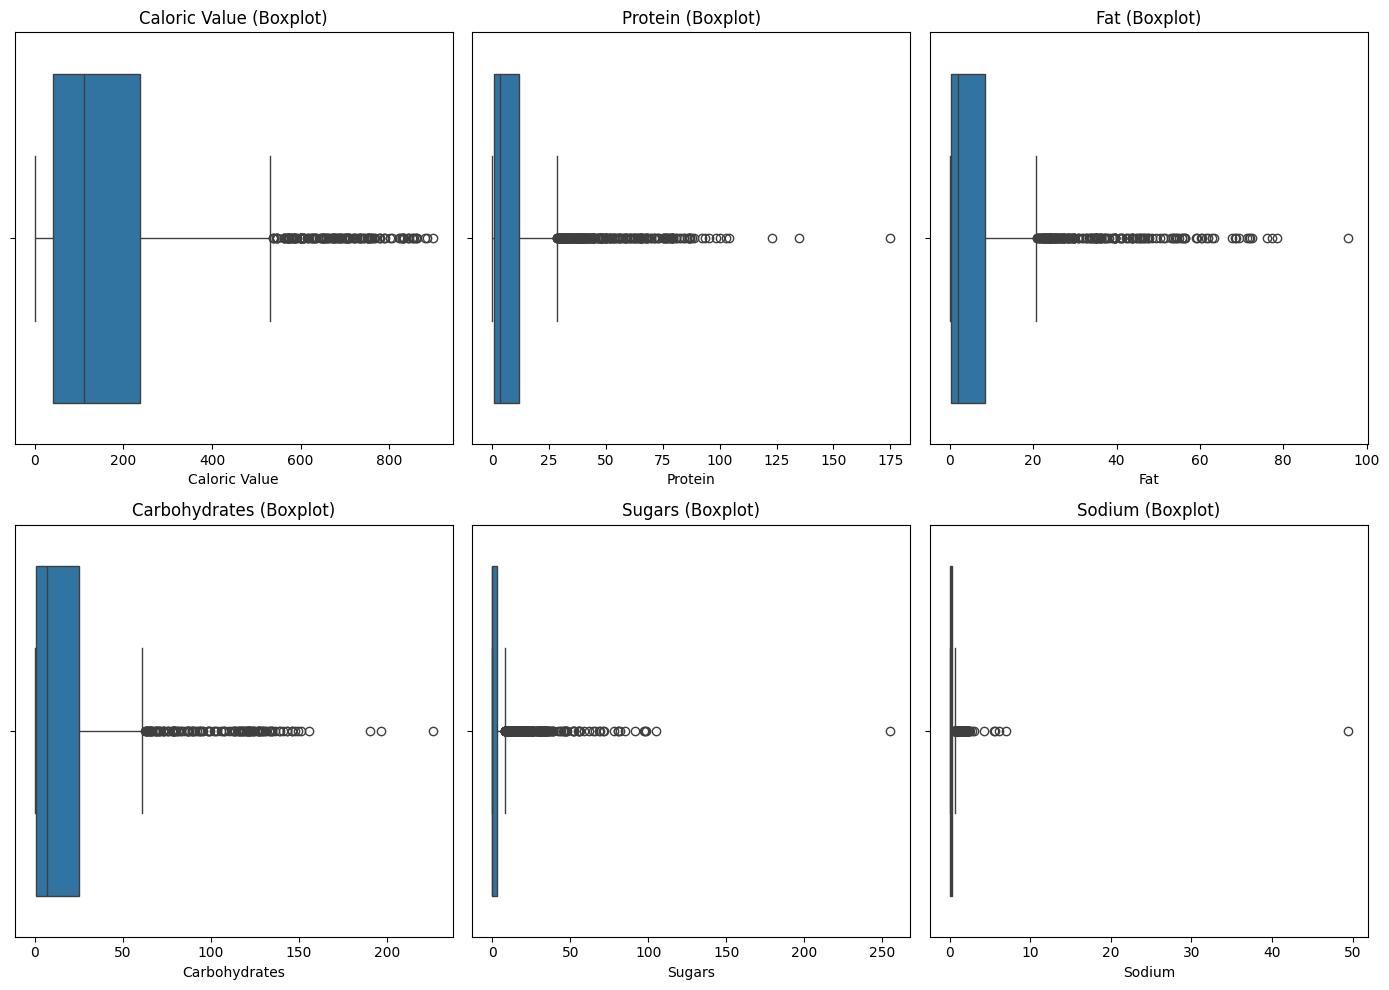

In [53]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(nutrients, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"{col} (Boxplot)")

plt.tight_layout()
plt.show()

#### Saving dataframe using pickle to serialize it and load it for future use on other notebooks

In [54]:
df.to_pickle("df_cleaned.pkl")

# use this code to load the dataframe in other notebooks:
# df = pd.read_pickle("df_cleaned.pkl")